___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [23]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
mpg=sns.load_dataset('mpg')

In [104]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [105]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


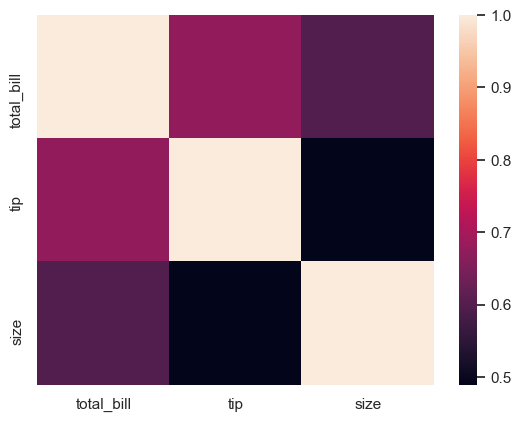

In [106]:
sns.heatmap(tips.corr())

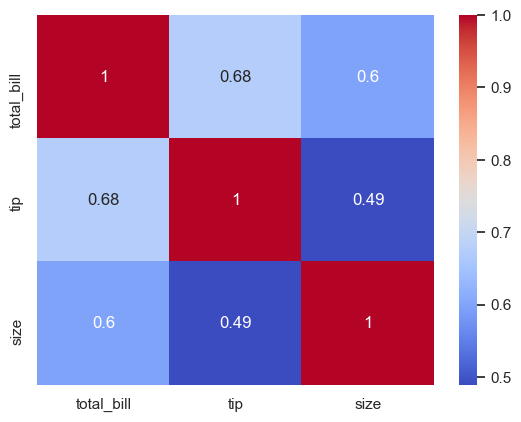

In [107]:
sns.heatmap(tips.corr(), annot= True, cmap = "coolwarm");### cmap rengini ayarladi, annot degerleri girdi.

In [29]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [30]:
flights.pivot_table("passengers", "month", "year") # 1. data 2 index, 3 column olur defeault
flights.pivot_table(index = 'month',columns = 'year',values = 'passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


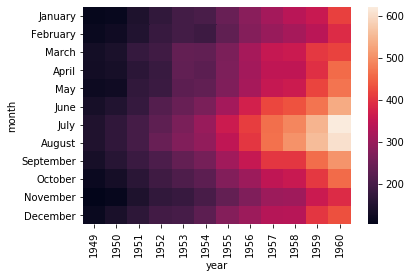

In [31]:
a = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(a)

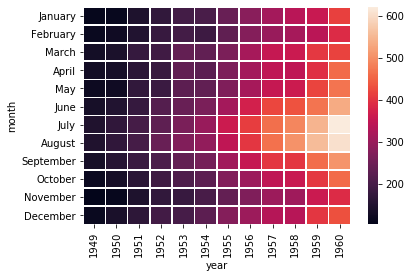

In [32]:
sns.heatmap(a, linecolor = "white", linewidths = 0.5)

In [101]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


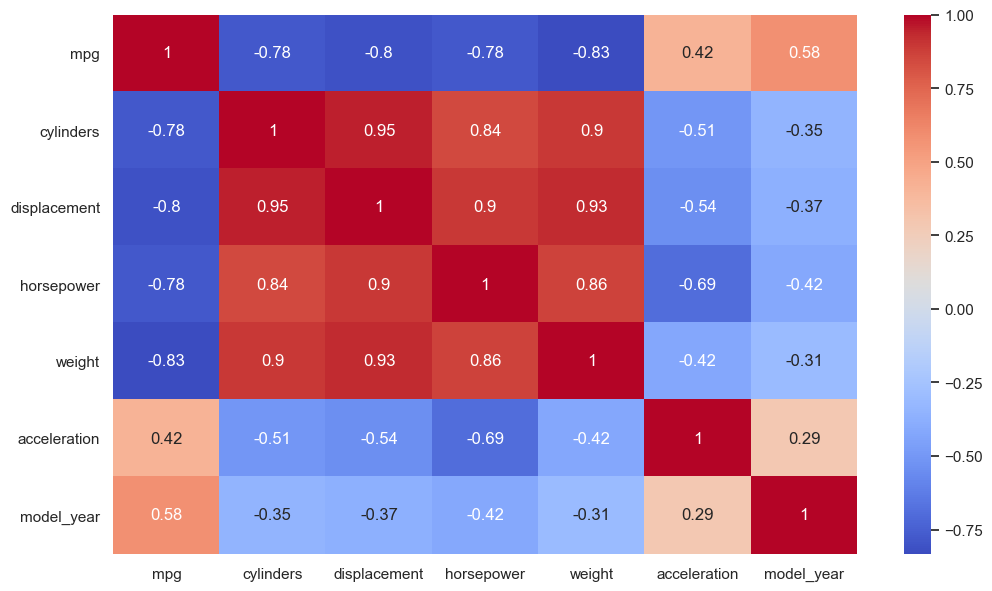

In [103]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(12,7))
sns.heatmap(mpg.corr(), annot= True, cmap = "coolwarm")

## GRIDS¶


In [108]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### pairplot¶

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

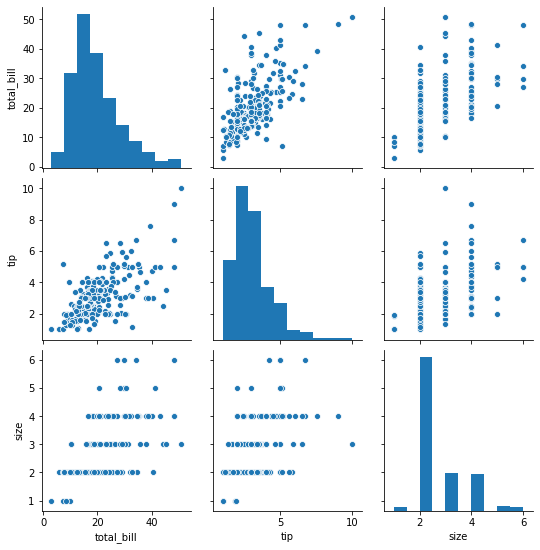

In [44]:
sns.pairplot(tips)

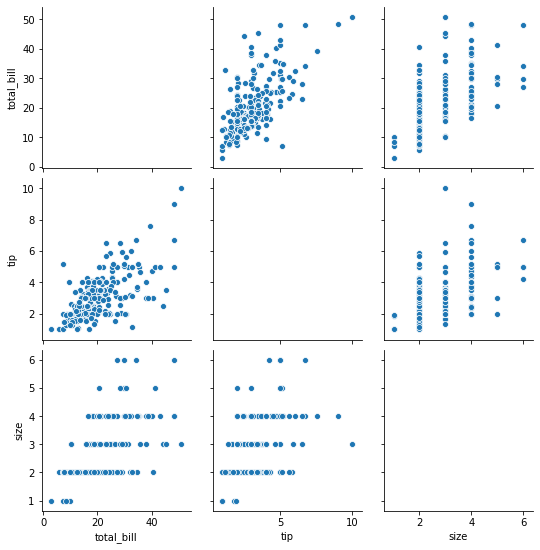

In [47]:
sns.pairplot(tips, diag_kind = "kind")
## diag_kind: auto, hist, kde, None

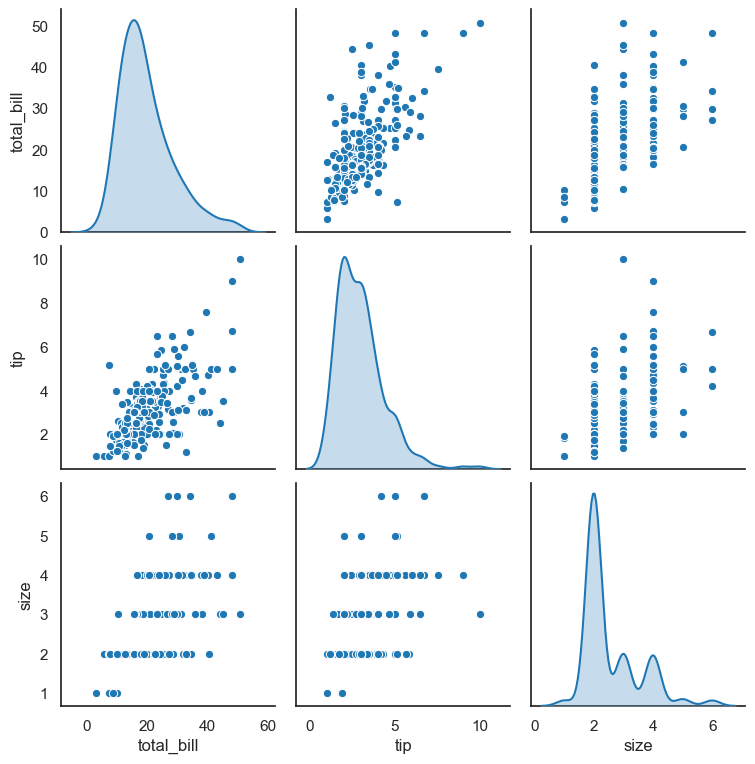

In [109]:
sns.pairplot(tips, diag_kind="kde")

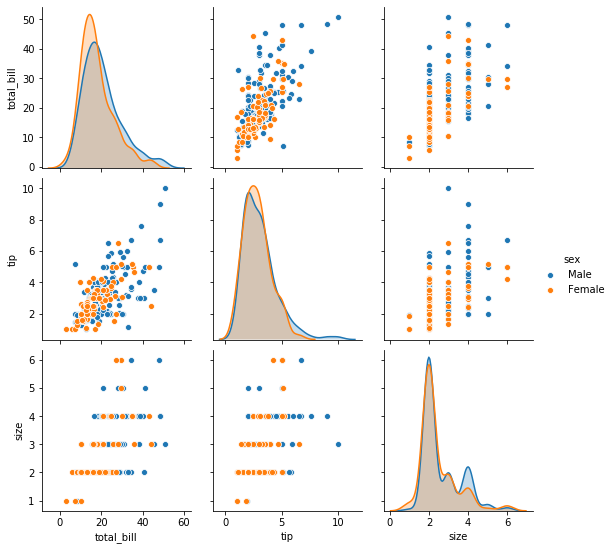

In [39]:
sns.pairplot(tips, hue = "sex") # en onemli pairplot a hue ekleyebilriz.
# kind scatter, digonal auto, hist, line 

## PairGrid cizimi 

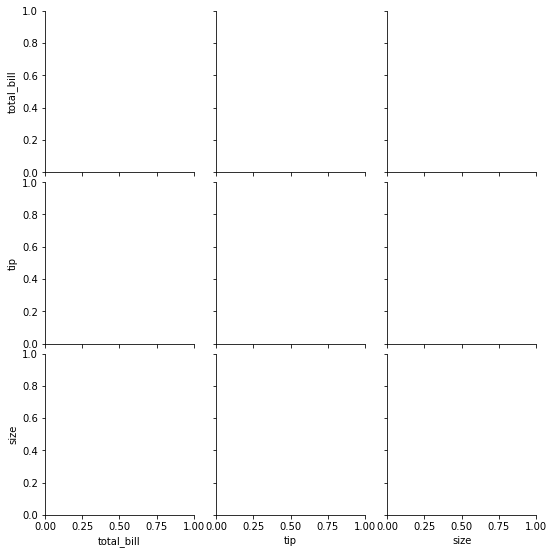

In [42]:
# Then you map to the grid
sns.PairGrid(tips) # ilk once boyle bir cizelge cizdiriyor sonra doldurucaz.

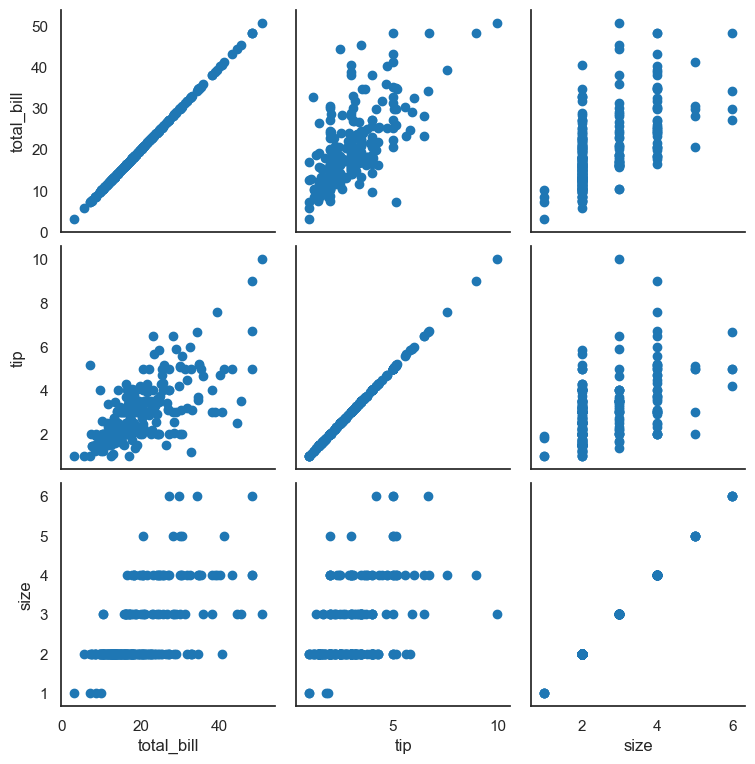

In [110]:
g=sns.PairGrid(tips)
g.map(plt.scatter)

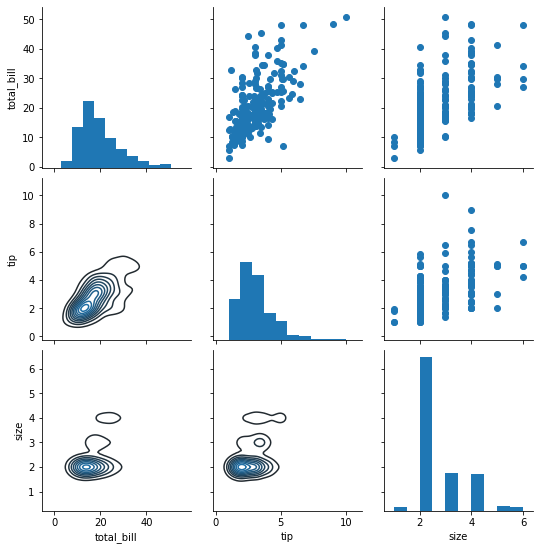

In [43]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(tips) #### kendisi alt tara kde ust taraf scatter oluyor.
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

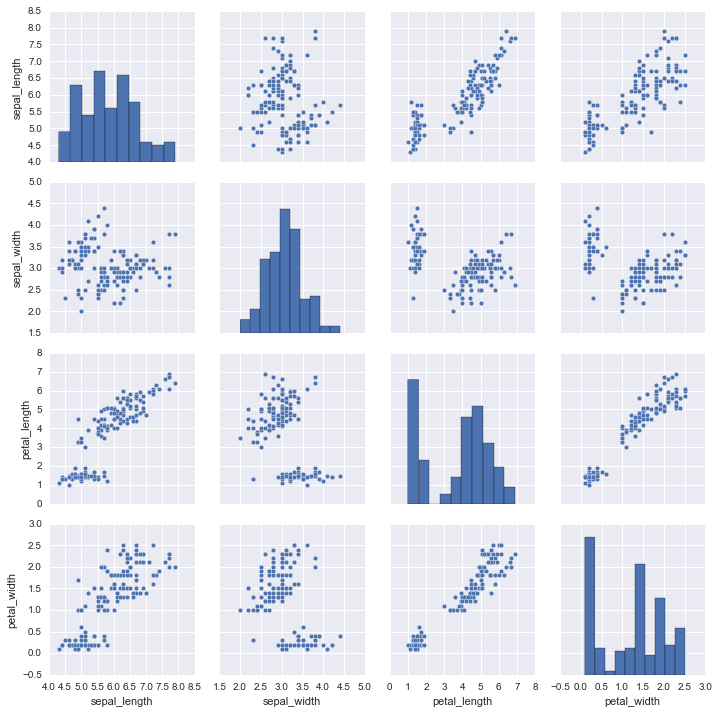

In [31]:
sns.pairplot(iris)

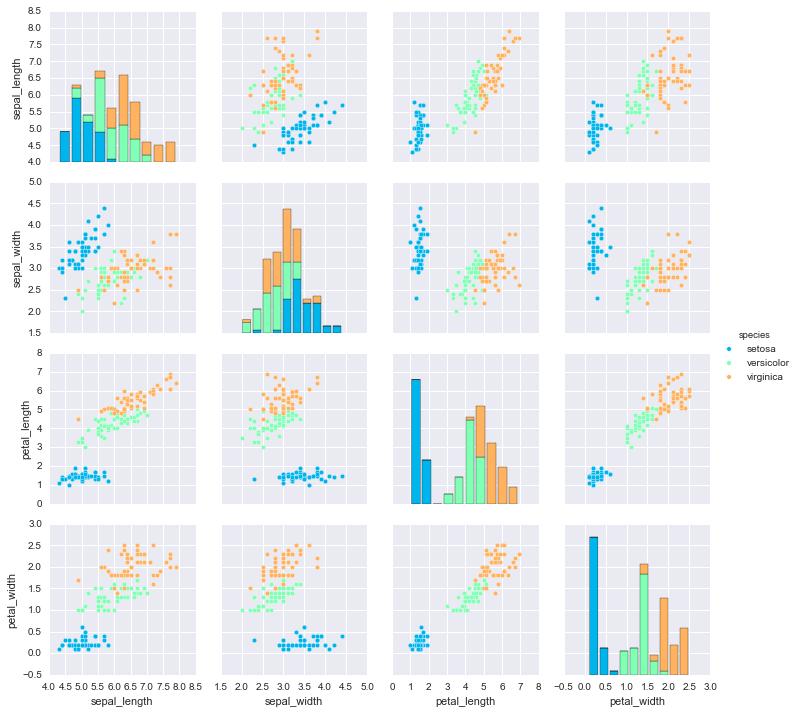

In [33]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [34]:
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


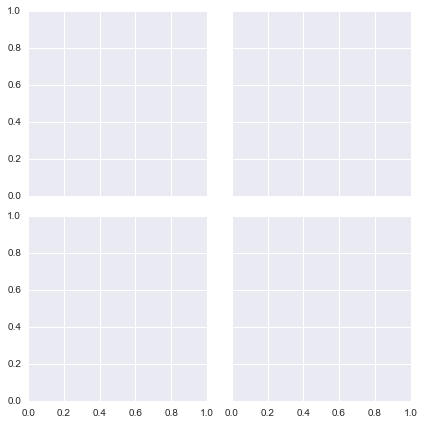

In [36]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

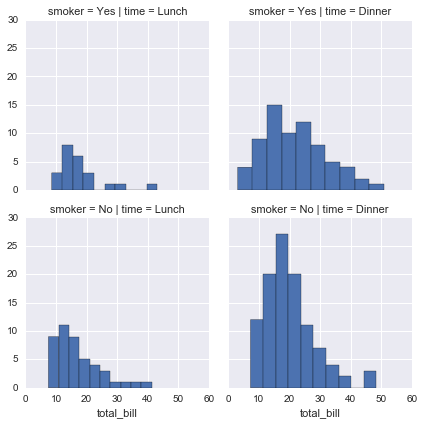

In [37]:
g = sns.FacetGrid(tips, col="time",  row="smoker") ### secilmis data ile calisiyor. 
g = g.map(plt.hist, "total_bill")  ##ogle yemeginde sigara icenler ve icmeyenlerin tips i var.

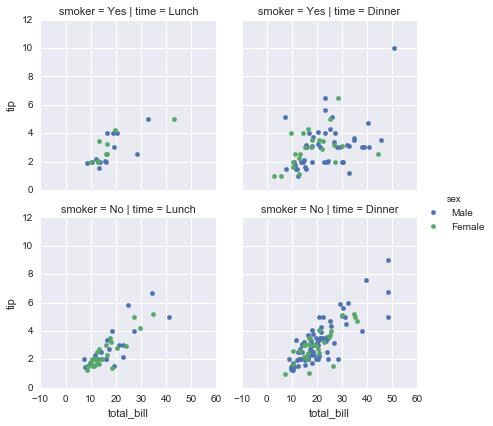

In [42]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

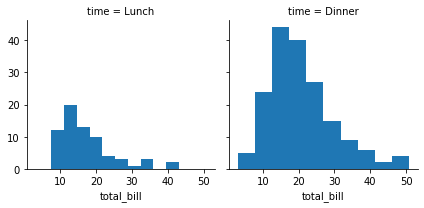

In [48]:
g = sns.FacetGrid(tips, col="time")
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.hist, "total_bill")

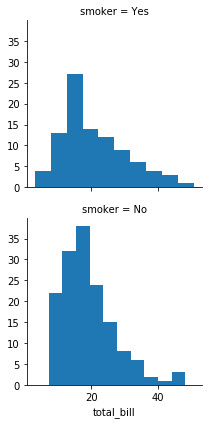

In [49]:
g = sns.FacetGrid(tips, row="smoker")
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.hist, "total_bill")

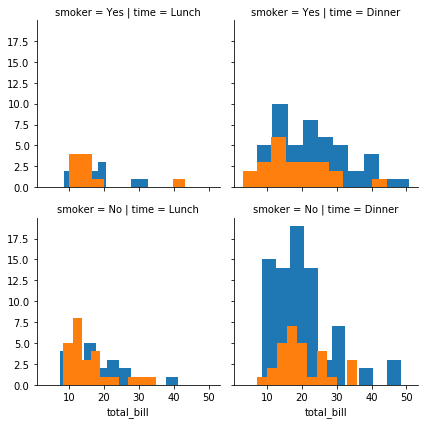

In [52]:
g = sns.FacetGrid(tips, col= "time", row="smoker", hue = "sex")
# Notice hwo the arguments come after plt.scatter call
g.map(plt.hist, "total_bill")

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

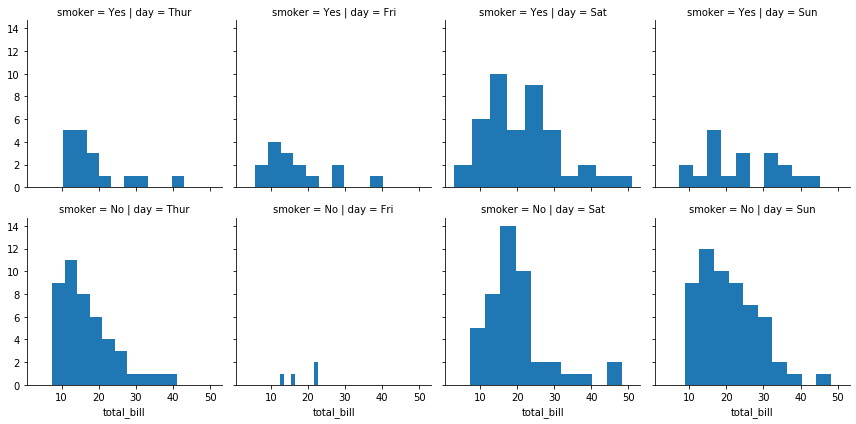

In [50]:
g = sns.FacetGrid(tips, col = "day", row="smoker")
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.hist, "total_bill")

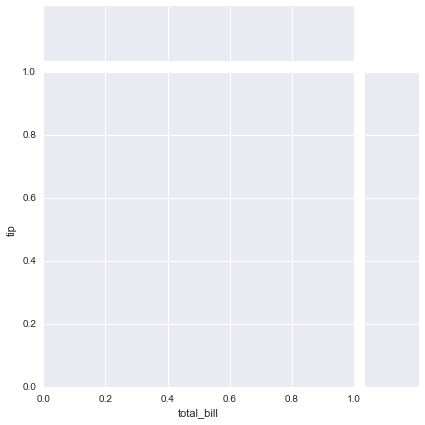

In [43]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


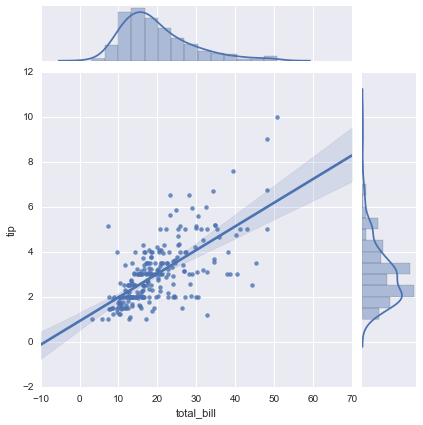

In [45]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)## her iki plotta cikar karsimiza

### Implot

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


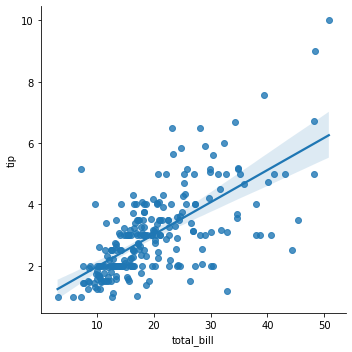

In [61]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, ci = 95) ## lm plor defeoult %95  ihtimalle bu golgeler arasinda kalir boy uzunlugu

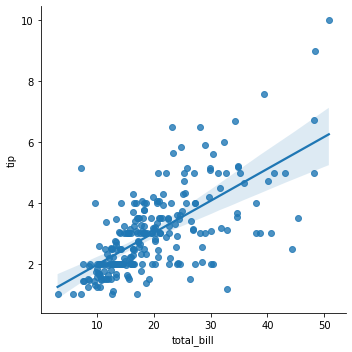

In [59]:
sns.lmplot(x = "total_bill", ci = 99,y = "tip", data = tips) # daha emin soyleyebilmek icin eror lar de artar.

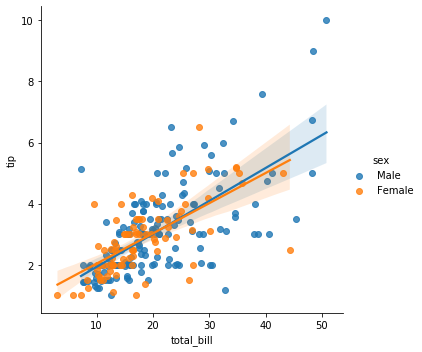

In [63]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, ci = 95, hue = "sex")

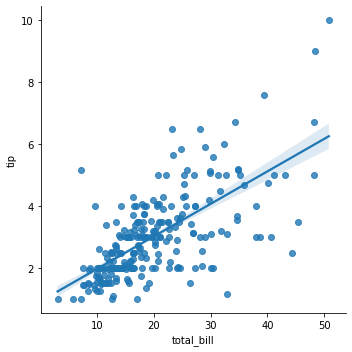

In [60]:
sns.lmplot(x = "total_bill", ci = 70, y = "tip", data = tips)

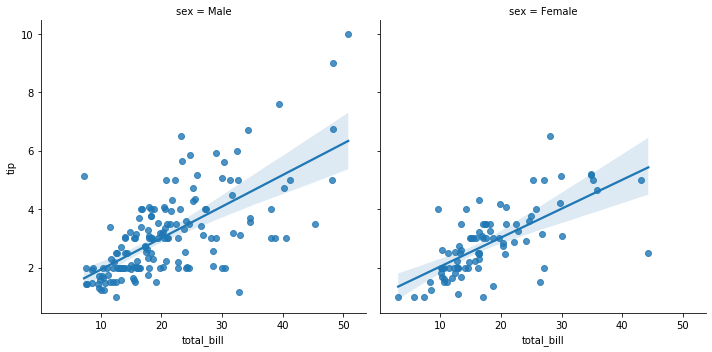

In [62]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, ci = 95, col = "sex")

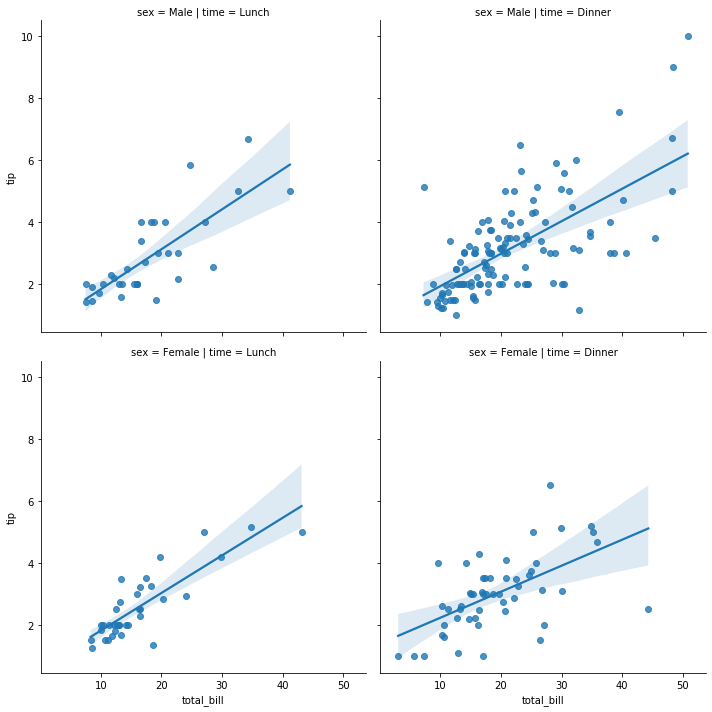

In [65]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, ci = 95, row = "sex", col = "time")
### facegrid deki gibi categorik degiskenleri lmplot a ekleyebiliyoruz.

<Figure size 1080x1440 with 0 Axes>

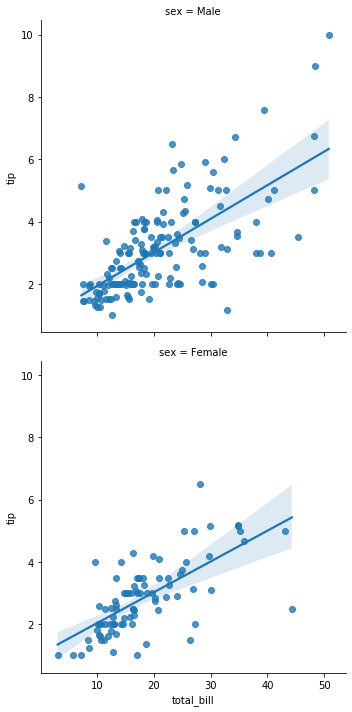

In [69]:
plt.figure(figsize = (15,20))
sns.lmplot(x = "total_bill", y = "tip", data = tips, ci = 95, row = "sex")

In [ ]:
## aspect and height (former) in lmplot

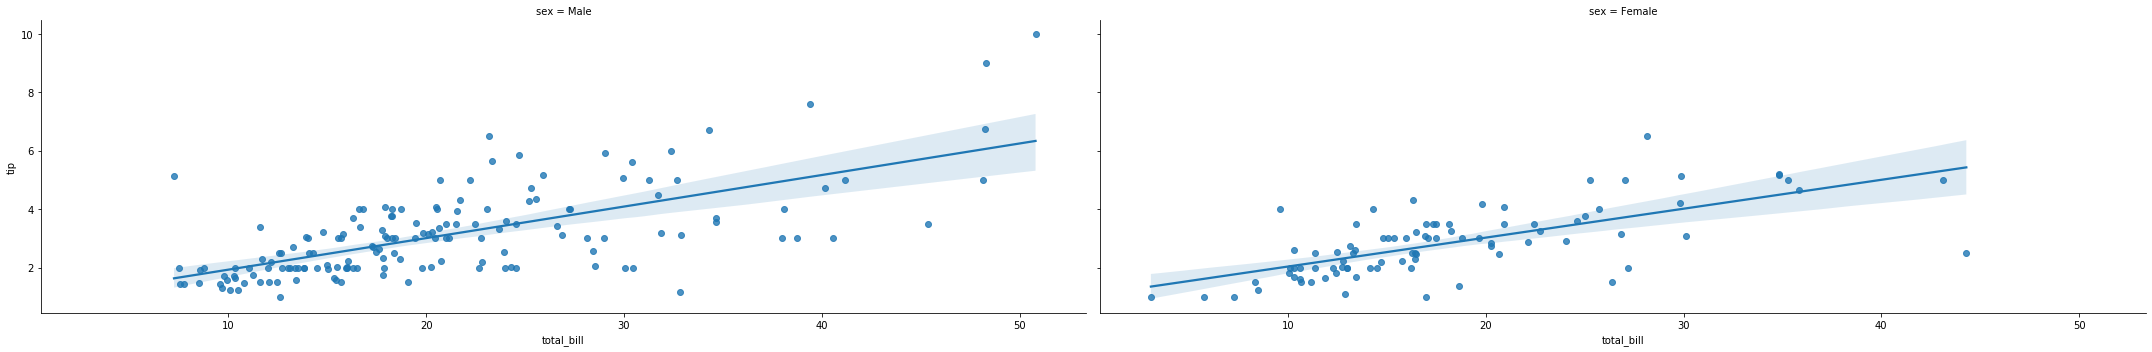

In [68]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, col = "sex", aspect = 3, height = 5)

In [ ]:
#### Style and Color

In [70]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


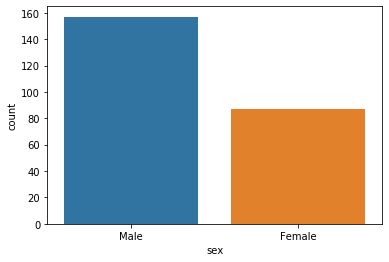

In [71]:
sns.countplot(x = "sex", data = tips)

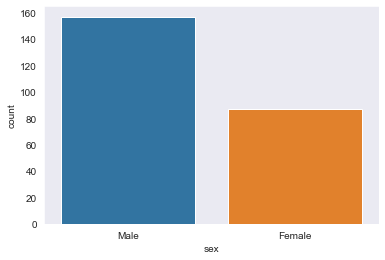

In [73]:
sns.set_style("dark") ## {darkgrid, whitegrid, dark, white, ticks} ile arka plan renk degisiyor.
sns.countplot(x = "sex", data = tips)

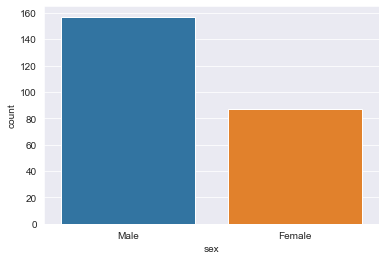

In [74]:
sns.set_style("darkgrid") ## {darkgrid, whitegrid, dark, white, ticks} ile arka plan renk degisiyor.
sns.countplot(x = "sex", data = tips)

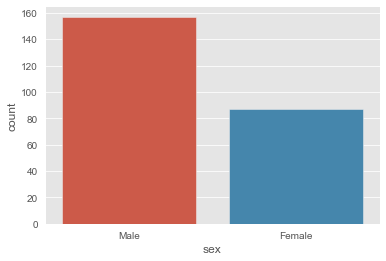

In [77]:
plt.style.use('ggplot')  ### ggplot ta kullanabiliriz 
sns.countplot(x = "sex", data = tips)

## spine removal (omurgayi kaldirma)

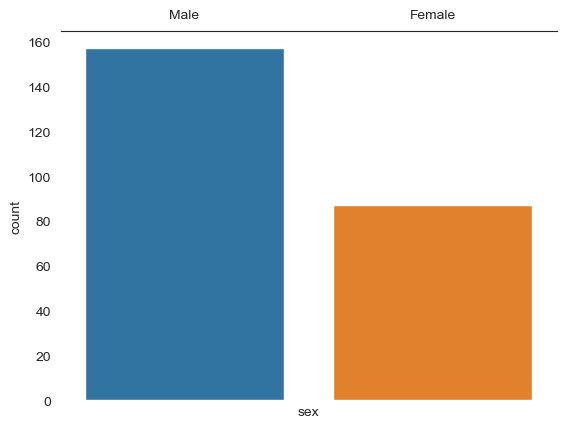

In [86]:
sns.set_style("white")
sns.countplot(x = "sex", data = tips)
sns.despine(left = True, bottom= True, top = False)

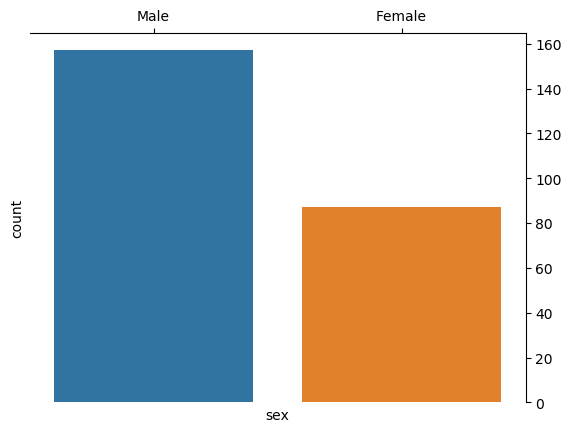

In [83]:
plt.style.use("default")
sns.countplot(x = "sex", data = tips)
sns.despine(left = True, bottom= True, top = False, right = False)

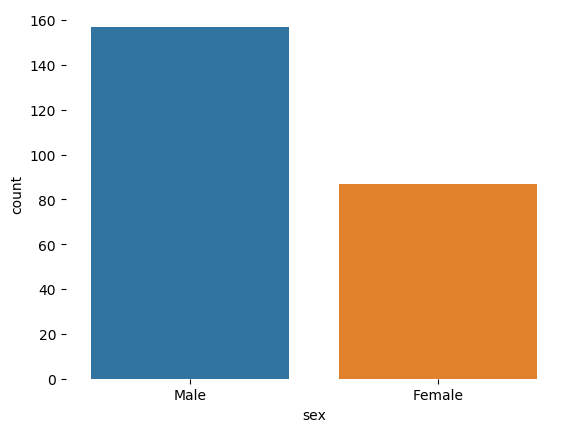

In [111]:
plt.style.use("default")
sns.countplot(x = "sex", data = tips)
sns.despine(left = True, bottom= True, top = True, right = True)

## contex
The base context
is "notebook", and the other contexts are "paper", "talk", and "poster"

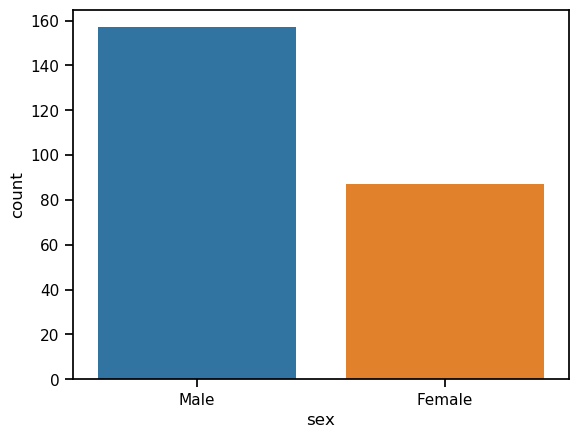

In [112]:
sns.set_context("notebook")
sns.countplot(x="sex", data=tips)

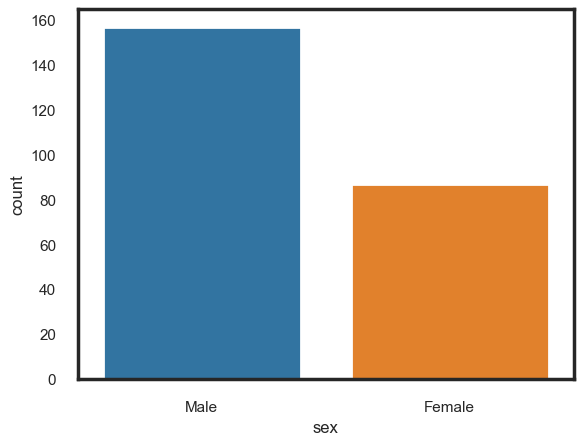

In [89]:
sns.set_context("poster", font_scale= 0.5) ### font sclae 0.5 yaziyi ayarliyor.
sns.countplot(x = "sex", data = tips)

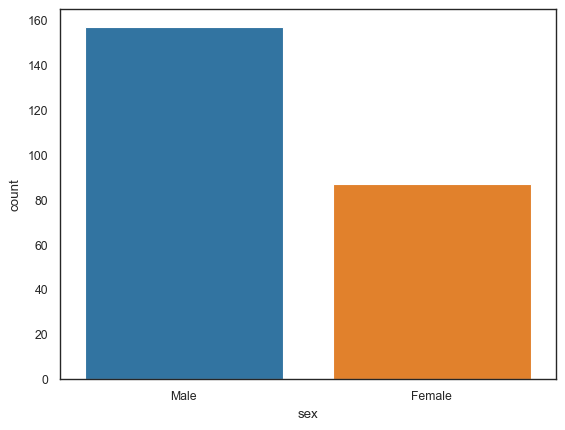

In [88]:
sns.set_context("paper")
sns.countplot(x = "sex", data = tips)

## color

In [93]:
x= ['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shel/PS',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

y=[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

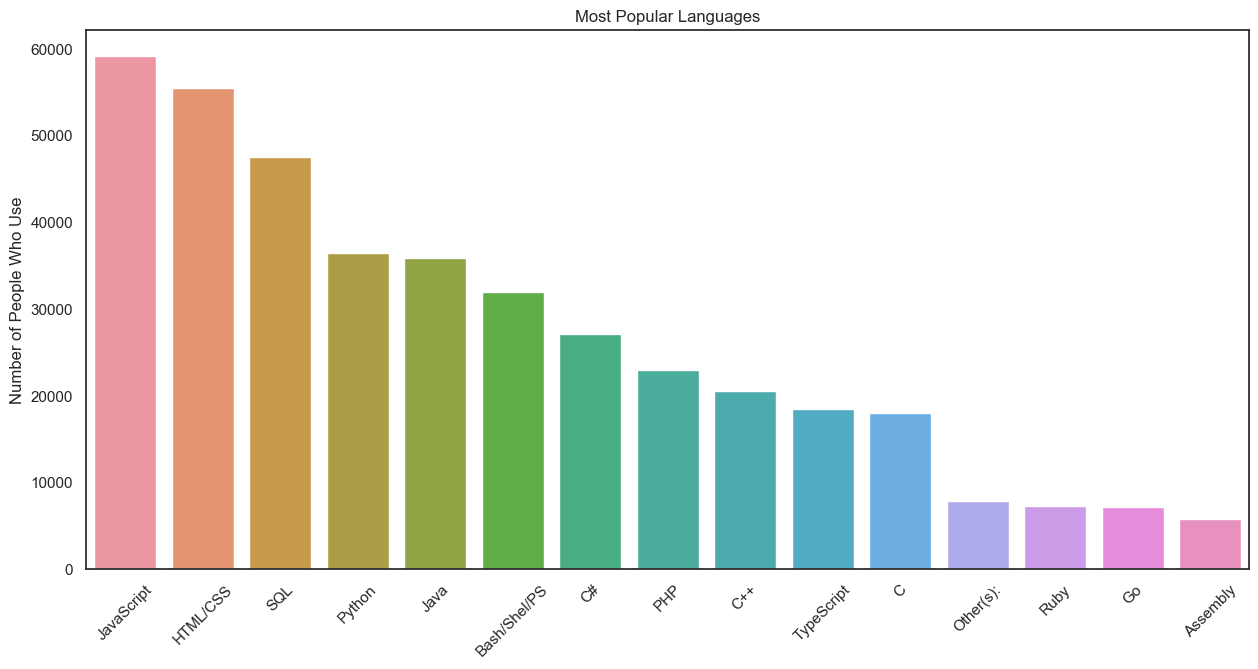

In [94]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context('notebook')
sns.barplot(x,y, palette=None)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

## https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html 
#### Buradan renk secimlerini ayarlayabiliriz palette icin.

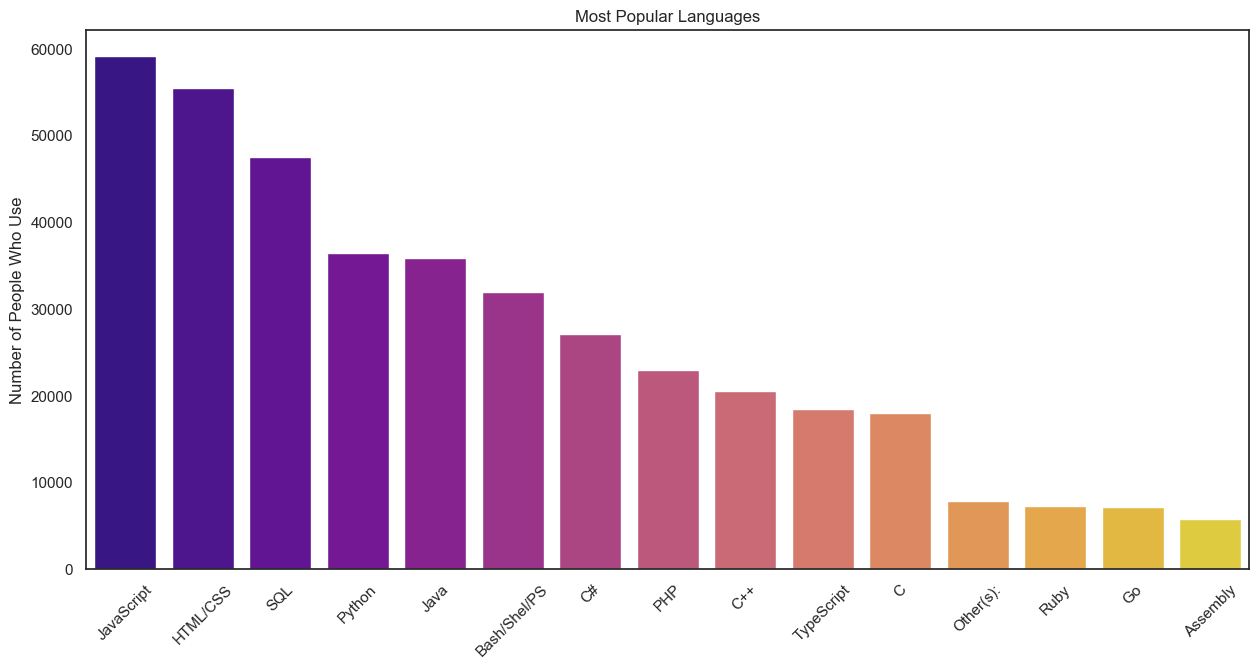

In [97]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context('notebook')
sns.barplot(x,y, palette='plasma')
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

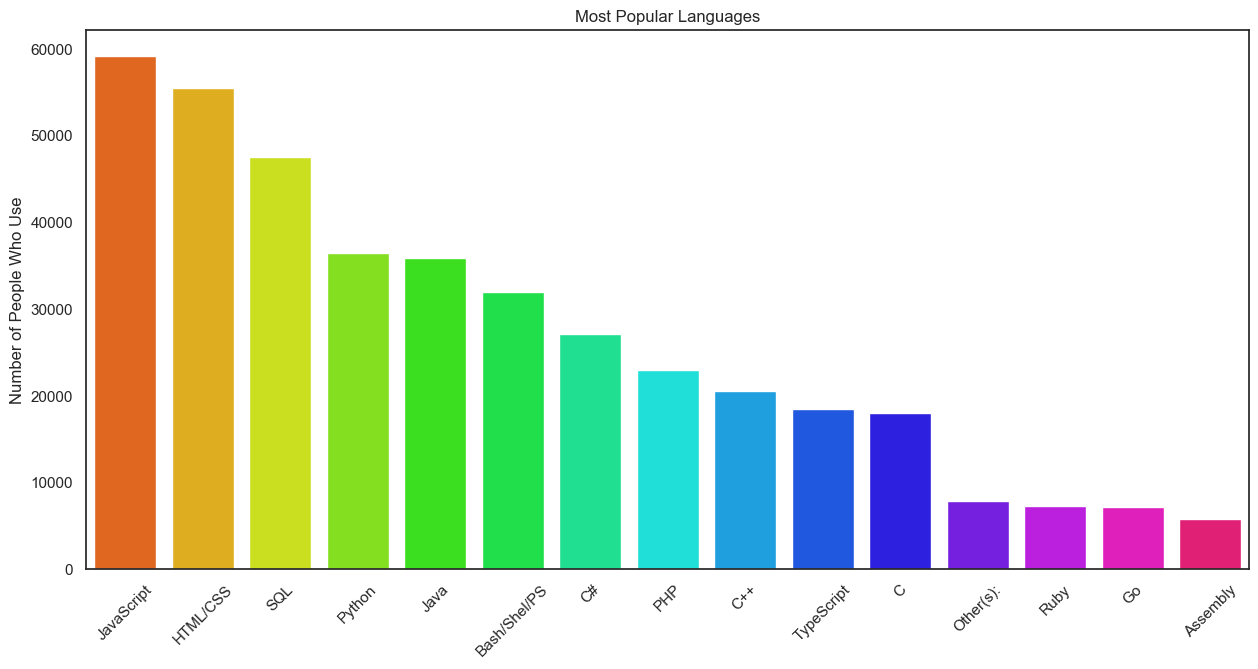

In [99]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context('notebook')
sns.barplot(x,y, palette='hsv')
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

Reference the documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.
# Great Job!